In [4]:
%pprint

Pretty printing has been turned OFF


In [50]:
import numpy as np
import csv
import datetime as dt
import matplotlib.pyplot as plt
import collections as co
from operator import itemgetter
import os
import datetime as dt
from scipy.spatial import ConvexHull
import itertools as it
import random as rd

In [6]:
ls

README.md          incidents (1).csv  nancrime.ipynb


In [7]:
# collect crime records into dat from csv
dat = []
with open('incidents (1).csv', newline='') as csvfile:
    spamreader1 = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i,row in enumerate(spamreader1):
        
        if i==0:
            ids = row
            
        else:  
            di = dict()
            for j,ID in enumerate(ids):
                
                if ID=='reportedtime':
                    Date = row[j].split(' ')
                    di['date'] = Date
                    continue
                di[ID] = row[j]
            dat.append(di)

In [8]:
# sample crime record
dat[0]

{'id': '4201201937861', 'file': '2019-37861', 'date': ['9/20/2019', '3:50:00', 'AM'], 'occurrencetype': 'Commercial Break and Enter', 'occurrencetypeid': '2120-01', 'crimetype': 'Break and Enter', 'crimetypeid': '1', 'crimecategory': 'Property Crime', 'crimecategoryid': '1', 'location': '23XX DORMAN RD', 'locationid': '39074', 'neighbourhood': 'Northfield', 'neighbourhoodid': '5', 'lat': '49.196446', 'long': '-123.985369'}

In [9]:
# 4422 crime records
len(dat)

4422

In [10]:
LAT = [float(crime['lat']) for crime in dat]
LONG = [float(crime['long']) for crime in dat] 
avg_lat = sum(LAT)/len(LAT)
avg_long = sum(LONG)/len(LONG)

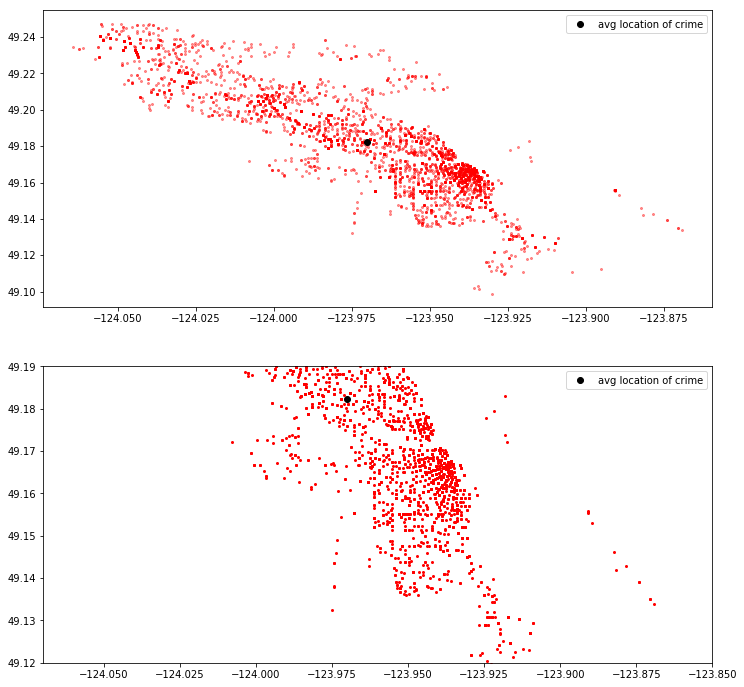

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(LONG,LAT,'ro',markersize=2,alpha=0.4)
plt.plot(avg_long,avg_lat,'o',color='black',label='avg location of crime')
plt.legend()
# plt.ylim(49.12,49.19)
# plt.xlim(-123,975,-123,925)
plt.subplot(212)
plt.plot(LONG,LAT,'ro',markersize=2)
plt.plot(avg_long,avg_lat,'o',color='black',label='avg location of crime')
plt.ylim(49.12,49.19)
plt.xlim(-124.07,-123.85)
plt.legend()


In [12]:
neighbourhoods = set()
for crime in dat:
    neighbourhoods.add(crime['neighbourhood'])

In [13]:
LAT = [(float(crime['lat']), crime['neighbourhood']) for crime in dat]
LONG = [(float(crime['long']), crime['neighbourhood']) for crime in dat] 

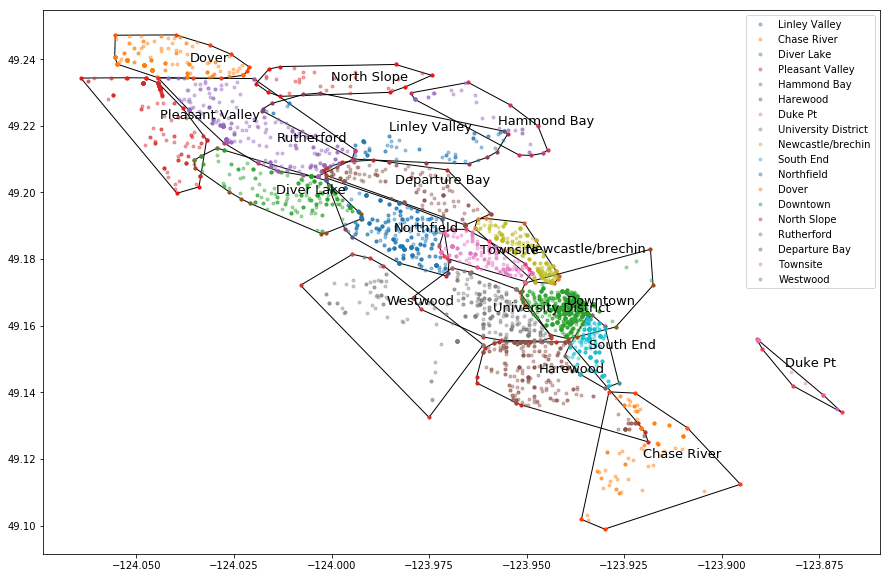

In [34]:
plt.close()
plt.figure(figsize=(15,10))
nDat = dict()
ctDat = dict()
ctdict = co.defaultdict(int)
for n in neighbourhoods:
    if n == "Unknown": continue

    LAT_n = [float(crime['lat']) for crime in dat if crime['neighbourhood']==n]
    LONG_n = [float(crime['long']) for crime in dat if crime['neighbourhood']==n]
    nDat[n] = []
    for crime in dat:
        if crime['neighbourhood']==n:
            nDat[n].append(crime)
            ctdict[n]+=1
    ctDat[n] = ctdict      
    PTS = np.asarray([(x,y) for x,y in zip(LONG_n,LAT_n)])
    hull = ConvexHull(PTS)
    plt.fill(PTS[hull.vertices,0], PTS[hull.vertices,1],fill=False)
    avg_hull_lat = sum([PTS[x][0] for x in hull.vertices])/len(hull.vertices)
    avg_hull_long = sum([PTS[x][1] for x in hull.vertices])/len(hull.vertices)
    plt.text(avg_hull_lat,avg_hull_long,n,size=13)
    for i in range(len(hull.vertices)):
        plt.plot(PTS[hull.vertices[i]][0],PTS[hull.vertices[i]][1], 'r.')
    plt.plot(LONG_n,LAT_n,'o',markersize=3,alpha=0.4,label=n)
    ctdictS = sorted(list(ctdict.items()),key=itemgetter(1))

plt.legend()

In [35]:
ctDatS = sorted(list(ctdict.items()),key=itemgetter(1))[-1:0:-1]

In [36]:
# Locations with number of crimes
ctDatS

[('Downtown', 1050), ('Northfield', 392), ('Rutherford', 319), ('Harewood', 309), ('Diver Lake', 299), ('Newcastle/brechin', 298), ('South End', 286), ('University District', 283), ('Dover', 247), ('Townsite', 196), ('Pleasant Valley', 196), ('Departure Bay', 174), ('Chase River', 101), ('Westwood', 87), ('Linley Valley', 83), ('Hammond Bay', 39), ('North Slope', 33)]

In [37]:
crime_counter = co.defaultdict(int)
for crime in dat:
    crime_counter[crime['crimetype']] += 1
CL = crime_counter.items()
CLS = sorted(list(CL),key=itemgetter(1))

In [38]:
print("Top crimes",end='\n \n')
for crim,num in CLS[::-1]:
    print(crim+':',num)

Top crimes
 
Mischief: 1391
Theft from Motor Vehicle: 1277
Theft: 730
Shoplifting: 471
Break and Enter: 401
Theft of Motor Vehicle: 152


In [39]:
occurence_counter = co.defaultdict(int)
for crime in dat:
    occurence_counter[crime['occurrencetype']] += 1
OL = occurence_counter.items()
OLS = sorted(list(OL),key=itemgetter(1))
print("Top crimes",end='\n \n')
for crim,num in OLS[::-1]:
    print(crim+':',num)

Top crimes
 
Theft from Motor Vehicle Under $5000: 1265
Mischief Under $5000: 905
Theft Other Under $5000: 568
Mischief - Loss of Enjoyment of Property: 471
Shoplifting Under $5000: 470
Commercial Break and Enter: 185
Residential Break and Enter: 141
Theft Bicycle Under $5000: 133
Other Break and Enter: 73
Theft of Auto Under $5000: 44
Theft of Truck Under $5000: 22
Theft of Auto Over $5000: 22
Theft of Motorcycle Under $5000: 18
Take Auto Without Consent Under $5000: 13
Theft of Truck Over $5000: 12
Theft From Motor Vehicle Over $5000: 12
Theft From Mail: 12
Theft Other Over $5000: 10
Mischief Over $5000: 8
Mischief Caused by Act/Ommission: 7
Theft of Other Vehicle Under $5000: 7
Take Auto Without Consent Over $5000: 6
Theft Bicycle Over $5000: 6
Theft of Other Vehicle Over $5000: 4
Theft of Motorcycle Over $5000: 4
Seasonal Residence Break and Enter: 2
Theft Electric/Gas/Telephone Under $5000: 1
Shoplifting Over $5000: 1


In [40]:
for loc in nDat.keys():
    occurence_counter = co.defaultdict(int)
    for crime in nDat[loc]:
        occurence_counter[crime['occurrencetype']] += 1
    OL = occurence_counter.items()
    OLS = sorted(list(OL),key=itemgetter(1))
    print("Top crimes in "+loc,end='\n \n')
    for crim,num in OLS[:-4:-1]:
        print(crim+':',num)
    print('-'*20,end='\n \n')

Top crimes in Linley Valley
 
Theft from Motor Vehicle Under $5000: 41
Mischief Under $5000: 18
Mischief - Loss of Enjoyment of Property: 6
--------------------
 
Top crimes in Chase River
 
Theft from Motor Vehicle Under $5000: 27
Mischief Under $5000: 19
Theft Other Under $5000: 19
--------------------
 
Top crimes in Diver Lake
 
Theft from Motor Vehicle Under $5000: 83
Mischief Under $5000: 61
Theft Other Under $5000: 42
--------------------
 
Top crimes in Pleasant Valley
 
Shoplifting Under $5000: 58
Theft from Motor Vehicle Under $5000: 47
Theft Other Under $5000: 27
--------------------
 
Top crimes in Hammond Bay
 
Mischief Under $5000: 15
Theft from Motor Vehicle Under $5000: 10
Theft Other Under $5000: 7
--------------------
 
Top crimes in Harewood
 
Theft from Motor Vehicle Under $5000: 84
Mischief Under $5000: 58
Theft Other Under $5000: 45
--------------------
 
Top crimes in Duke Pt
 
Theft from Motor Vehicle Under $5000: 9
Theft Other Under $5000: 8
Mischief Under $500

In [41]:
def get_crime_type(crime):
    return crime['crimetype']+': '+crime['occurrencetype']

In [42]:
types = set()
for dat_i in dat:
    types.add(dat_i['crimetype']+': '+dat_i['occurrencetype'])

In [43]:
weekdays = ['Mon', 'Tue', 'Wed', "Th",'Fri','Sat',"Sun"]

In [44]:
type_day_dat = dict()
for typ in types:
    ctdi = co.defaultdict(int)
    for crime in dat:
        if get_crime_type(crime) == typ :
            d = crime['date'][0].split('/')
            crime_dt = dt.datetime(int(d[-1]),int(d[0]),int(d[1]))
            ctdi[weekdays[crime_dt.weekday()]] += 1
    ctdiS = sorted(list(ctdi.items()),key=itemgetter(1))[-1:-16:-1]
    if ctdiS[-1][1]>=6:
        type_day_dat[typ] = ctdiS      

In [54]:
PTS = []
for i,(n,di) in enumerate(nDat.items()):
    print(i,n)
    avg_long = sum([float(crime['long']) for crime in di])/len(di)
    avg_lat = sum([float(crime['lat']) for crime in di])/len(di)
    PTS.append((avg_lat,avg_long))
PTS = np.array(PTS)

0 Linley Valley
1 Chase River
2 Diver Lake
3 Pleasant Valley
4 Hammond Bay
5 Harewood
6 Duke Pt
7 University District
8 Newcastle/brechin
9 South End
10 Northfield
11 Dover
12 Downtown
13 North Slope
14 Rutherford
15 Departure Bay
16 Townsite
17 Westwood


In [60]:
for n,(la,lo) in zip(neighbourhoods,PTS):
    print(n,'at %.2f , %.2f' % (la,lo))

Linley Valley at 49.22 , -123.98
Chase River at 49.12 , -123.92
Diver Lake at 49.20 , -124.01
Pleasant Valley at 49.22 , -124.04
Hammond Bay at 49.22 , -123.96
Harewood at 49.15 , -123.95
Duke Pt at 49.15 , -123.89
University District at 49.17 , -123.96
Newcastle/brechin at 49.18 , -123.95
South End at 49.16 , -123.93
Unknown at 49.19 , -123.98
Northfield at 49.24 , -124.04
Dover at 49.17 , -123.94
Downtown at 49.23 , -124.00
North Slope at 49.22 , -124.02
Rutherford at 49.20 , -123.98
Departure Bay at 49.18 , -123.96
Townsite at 49.16 , -123.98
